In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import os
from scipy.signal import argrelmin, argrelmax
%matplotlib inline

In [2]:
def read_imag_values(file):
    result = []
    with open(file) as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for index, row in enumerate(reader):
            result.append([float(element) for element in row])
    return(result)

In [3]:
def flip_minima(abs_values, real_values):
    main_peak = np.argmax(abs_values) # index of main peak
    left_min = [0]
    right_min = [main_peak]
    for loc_min in argrelmin(abs_values, order=2)[0]:
        if loc_min < main_peak:
            left_min.append(loc_min)
        else: right_min.append(loc_min)
    left_min.append(main_peak)
    right_min.append(len(abs_values))
    left_min_rev = list(reversed(left_min))
    
    osc = []
    n = len(left_min)
    for i in range(n - 1):
        #print(n-i - 1, n-i-2)
        for index in range(left_min_rev[n  - i - 1], left_min_rev[n - i - 2]):
            #osc.append((-1)**(i+1) * abs(real_values[index]))
            osc.append((-1)**(n - i) * abs(real_values[index]))
    for i in range(n - 1):
        #print(i, i+1)
        for index in range(right_min[i], right_min[i+1]):
            osc.append((-1)**i * abs(real_values[index]))

    return(osc)
    

In [4]:
def transform_to_density(b_values, Ic_values, y_values):
    W = 360 # in m, scaled system size
    L = 100 # in m, scaled system size
    omega = 2 * np.pi / W
    
    phi_values = b_values * W * L 
    dPhi = phi_values[1] - phi_values[0]
    maxPhi = phi_values[-1]

    real, imag = Ic_values
    
    Jy_values = []
    for y in y_values:
        Jy_real = 0
        Jy_imag = 0
        for k, phi in enumerate(phi_values):
            Ic_real = real[k] #Fourier coefficient
            Ic_imag = imag[k]
            #Jy_real += np.cos(np.pi * phi / (2 * maxPhi))**0.5 *(Ic_real * np.cos(omega * phi * y) - Ic_imag * np.sin(omega * phi * y)) * dPhi
            #Jy_imag += np.cos(np.pi * phi / (2 * maxPhi))**0.5 *(Ic_imag * np.cos(omega * phi * y) + Ic_real * np.sin(omega * phi * y)) * dPhi
            Jy_real += np.cos(np.pi * phi / (2 * maxPhi))**0 *(Ic_real * np.cos(omega * phi * y) - Ic_imag * np.sin(omega * phi * y)) * dPhi
            Jy_imag += np.cos(np.pi * phi / (2 * maxPhi))**0 *(Ic_imag * np.cos(omega * phi * y) + Ic_real * np.sin(omega * phi * y)) * dPhi
            
        Jy_abs = np.sqrt(Jy_real**2 + Jy_imag**2)
        Jy_values.append(Jy_abs)
    return(Jy_values)

In [5]:
def get_dirs(directory):
    dirpath, dirnames, filenames = list(os.walk(directory))[0]
    for dirname in dirnames:
        if dirname[:3] == 'vsg':
            #yield(dirpath + dirname + '/data.csv')
            vsg = dirname[4:-18]
            yield(dirpath + dirname + '/data.csv', vsg)
    #subdirs = next(os.walk(directory))[1]
    #for subdir in subdirs:
    #    if subdir
    #    vsg = subdir[4:-18]
    #    yield((vsg, directory + subdir + '/data.csv'))

In [6]:
W = 360 # in m, scaled system size
L = 100 # in m, scaled system size

In [7]:
maxB = 0.0001
magnetic_field = np.linspace(-maxB, maxB, 1000)
phi = magnetic_field * W * L

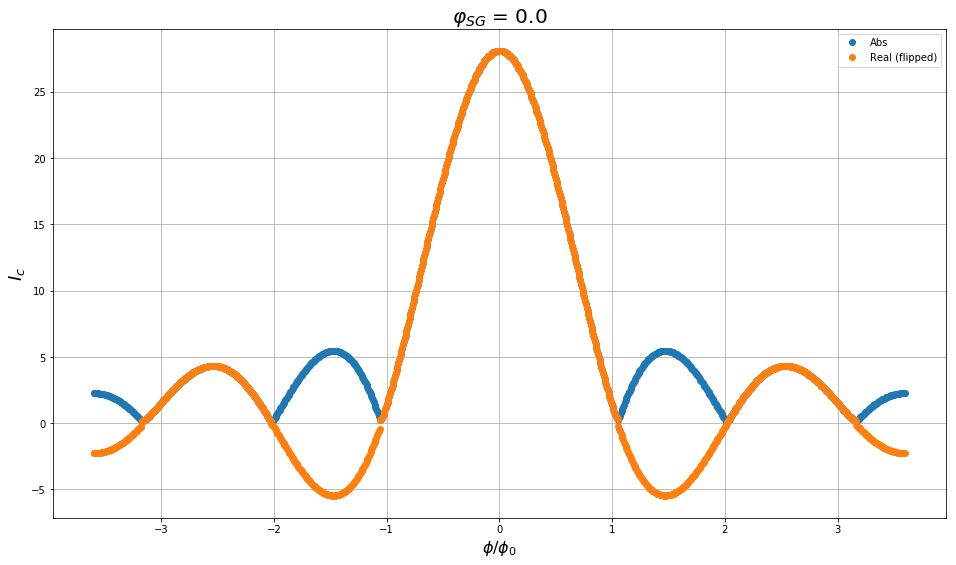

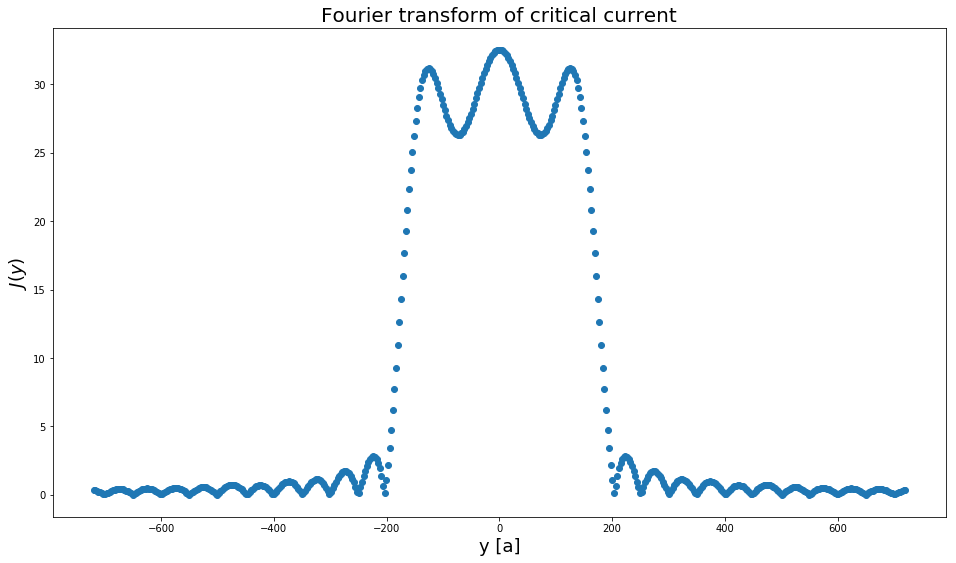

In [16]:
datafile, vsg = sorted(list(get_dirs('/home/nefta/thesis/results/wg3_2/supercurrent/')))[-1]
values = np.asarray(read_imag_values(datafile)).T
absval , realval, imagval = values
realval_osc = flip_minima(absval, realval)
y = np.linspace(-2*W, 2*W, 500)
fourier = transform_to_density(magnetic_field, (realval_osc, imagval), y)
fig, ax = plt.subplots(figsize=(16,9))
ax.set_title(r'$\varphi_{{SG}}$ = {}'.format(vsg), fontsize=20)
ax.plot(phi, absval, marker='o', linestyle='none', label='Abs')
ax.plot(phi, realval_osc, marker='o', linestyle='none', label='Real (flipped)')
ax.legend()
ax.set_xlabel(r'$\phi / \phi_0$', fontsize=16)
ax.set_ylabel(r'$I_c$', fontsize=18)
ax.grid()

fig1, ax1 = plt.subplots(figsize=(16,9))
ax1.plot(y, fourier, marker='o', linestyle='none', )
ax1.set_title('Fourier transform of critical current', fontsize=20)
ax1.set_xlabel('y [a]', fontsize=18)
ax1.set_ylabel(r'$J(y)$',  fontsize=18)

In [21]:
list(get_dirs('/home/nefta/thesis/results/wg3_2/supercurrent/'))

[('/home/nefta/thesis/results/wg3_2/supercurrent/vsg=-0.45-20171027-14:04:06/data.csv',
  '-0.45'),
 ('/home/nefta/thesis/results/wg3_2/supercurrent/vsg=-0.4-20171026-13:46:14/data.csv',
  '-0.4'),
 ('/home/nefta/thesis/results/wg3_2/supercurrent/vsg=0.0-20171025-15:47:01/data.csv',
  '0.0'),
 ('/home/nefta/thesis/results/wg3_2/supercurrent/vsg=-0.3-20171027-13:47:31/data.csv',
  '-0.3'),
 ('/home/nefta/thesis/results/wg3_2/supercurrent/vsg=-0.4-20171027-13:58:34/data.csv',
  '-0.4'),
 ('/home/nefta/thesis/results/wg3_2/supercurrent/vsg=-0.2-20171026-13:34:57/data.csv',
  '-0.2'),
 ('/home/nefta/thesis/results/wg3_2/supercurrent/vsg=-0.5-20171027-14:09:37/data.csv',
  '-0.5'),
 ('/home/nefta/thesis/results/wg3_2/supercurrent/vsg=-0.35-20171027-13:53:03/data.csv',
  '-0.35'),
 ('/home/nefta/thesis/results/wg3_2/supercurrent/vsg=-0.2-20171027-13:36:24/data.csv',
  '-0.2'),
 ('/home/nefta/thesis/results/wg3_2/supercurrent/vsg=-0.1-20171026-13:29:16/data.csv',
  '-0.1'),
 ('/home/nefta/the

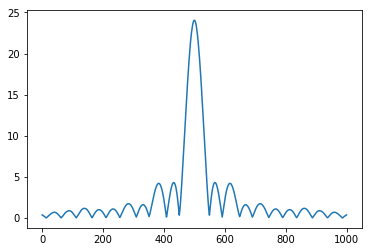

In [26]:
datafile, vsg = list(get_dirs('/home/nefta/thesis/results/wg3_2/supercurrent/'))[0]
datafile1, vsg1 = list(get_dirs('/home/nefta/thesis/results/wg3_2/supercurrent/'))[3]
values = np.asarray(read_imag_values(datafile)).T
values1 = np.asarray(read_imag_values(datafile1)).T
absval , realval, imagval = values
absval1, realval1, imagval1 = values1

plt.plot(values1[0])

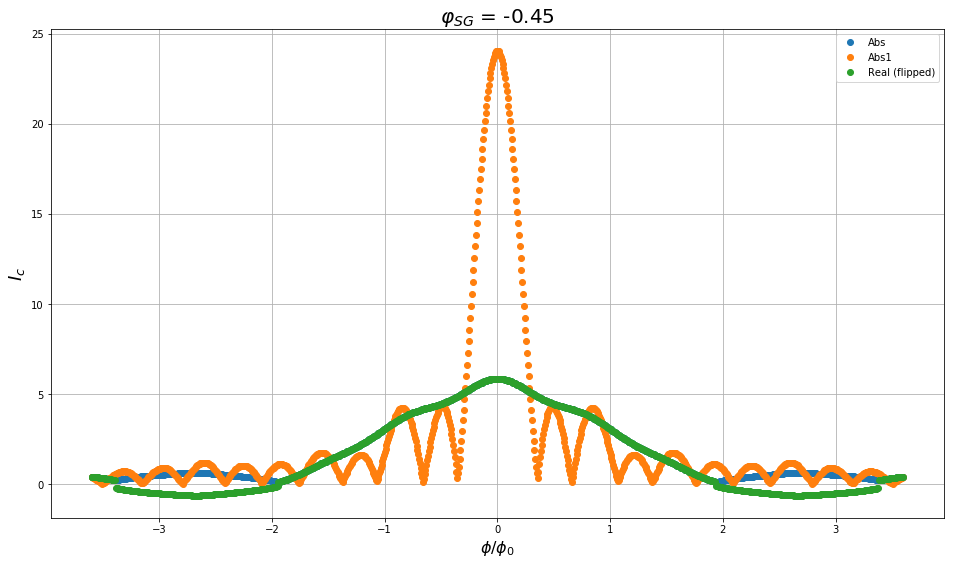

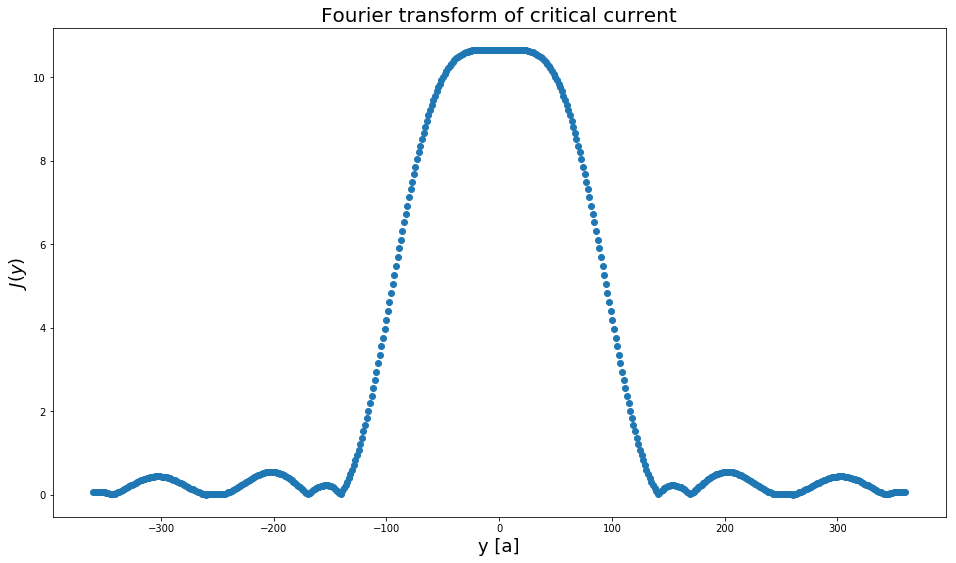

In [22]:
datafile, vsg = list(get_dirs('/home/nefta/thesis/results/wg3_2/supercurrent/'))[0]
datafile1, vsg1 = list(get_dirs('/home/nefta/thesis/results/wg3_2/supercurrent/'))[3]
values = np.asarray(read_imag_values(datafile)).T
values1 = np.asarray(read_imag_values(datafile1)).T
absval , realval, imagval = values
absval1, realval1, imagval1 = values1
realval_osc = flip_minima(absval, realval)
y = np.linspace(-W, W, 500)
fourier = transform_to_density(magnetic_field, (realval_osc, imagval), y)
fig, ax = plt.subplots(figsize=(16,9))
ax.set_title(r'$\varphi_{{SG}}$ = {}'.format(vsg), fontsize=20)
ax.plot(phi, absval, marker='o', linestyle='none', label='Abs')
ax.plot(phi, realval_osc, marker='o', linestyle='none', label='Real (flipped)')
ax.legend()
ax.set_xlabel(r'$\phi / \phi_0$', fontsize=16)
ax.set_ylabel(r'$I_c$', fontsize=18)
ax.grid()

fig1, ax1 = plt.subplots(figsize=(16,9))
ax1.plot(y, fourier, marker='o', linestyle='none', )
ax1.set_title('Fourier transform of critical current', fontsize=20)
ax1.set_xlabel('y [a]', fontsize=18)
ax1.set_ylabel(r'$J(y)$',  fontsize=18)

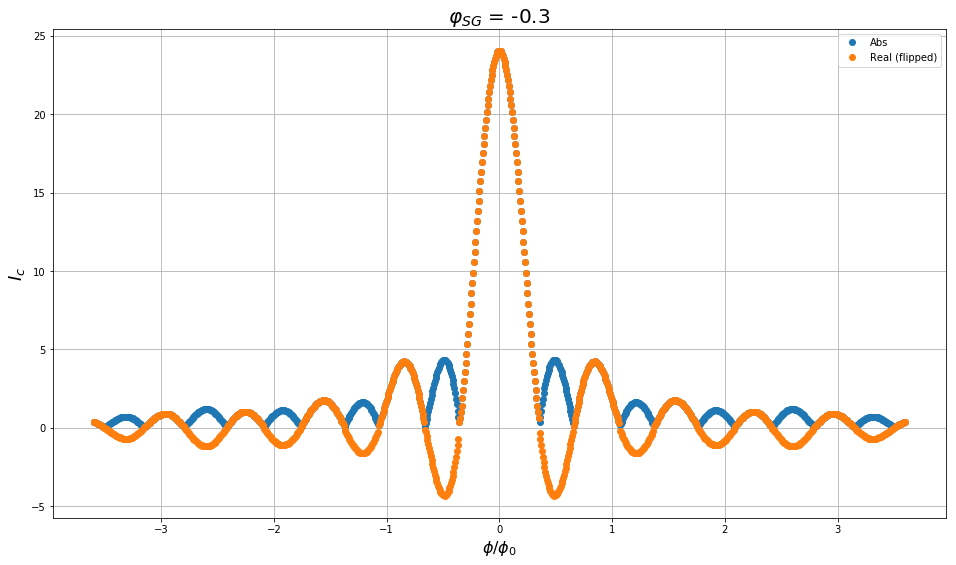

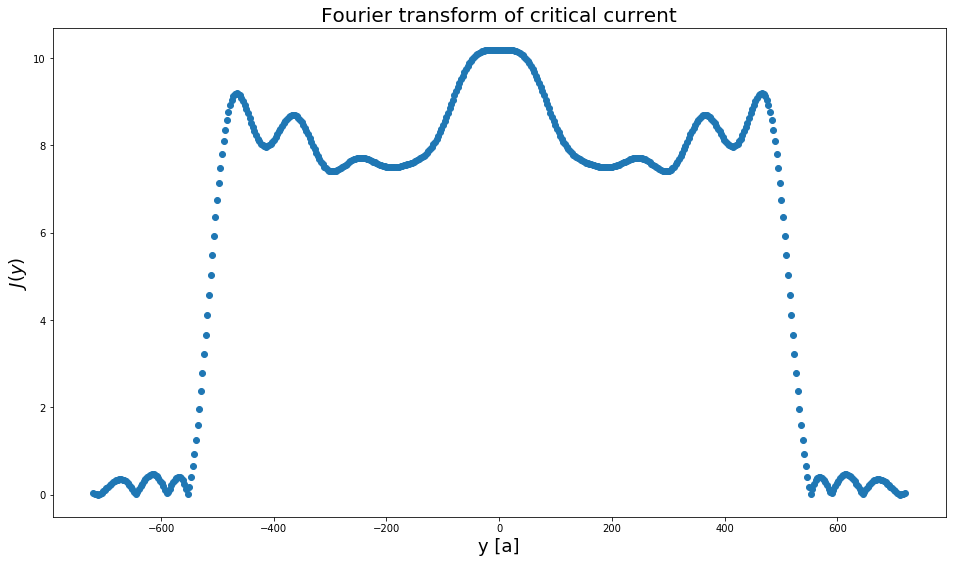

In [15]:
datafile, vsg = list(get_dirs('/home/nefta/thesis/results/wg3_2/supercurrent/'))[3]
values = np.asarray(read_imag_values(datafile)).T
absval , realval, imagval = values
realval_osc = flip_minima(absval, realval)
y = np.linspace(-2*W, 2*W, 500)
fourier = transform_to_density(magnetic_field, (realval_osc, imagval), y)
fig, ax = plt.subplots(figsize=(16,9))
ax.set_title(r'$\varphi_{{SG}}$ = {}'.format(vsg), fontsize=20)
ax.plot(phi, absval, marker='o', linestyle='none', label='Abs')
ax.plot(phi, realval_osc, marker='o', linestyle='none', label='Real (flipped)')
#ax.plot(phi, np.sin(phi)/np.abs(phi), label='sinc')
ax.legend()
ax.set_xlabel(r'$\phi / \phi_0$', fontsize=16)
ax.set_ylabel(r'$I_c$', fontsize=18)
ax.grid()

fig1, ax1 = plt.subplots(figsize=(16,9))
ax1.plot(y, fourier, marker='o', linestyle='none', )
ax1.set_title('Fourier transform of critical current', fontsize=20)
ax1.set_xlabel('y [a]', fontsize=18)
ax1.set_ylabel(r'$J(y)$',  fontsize=18)

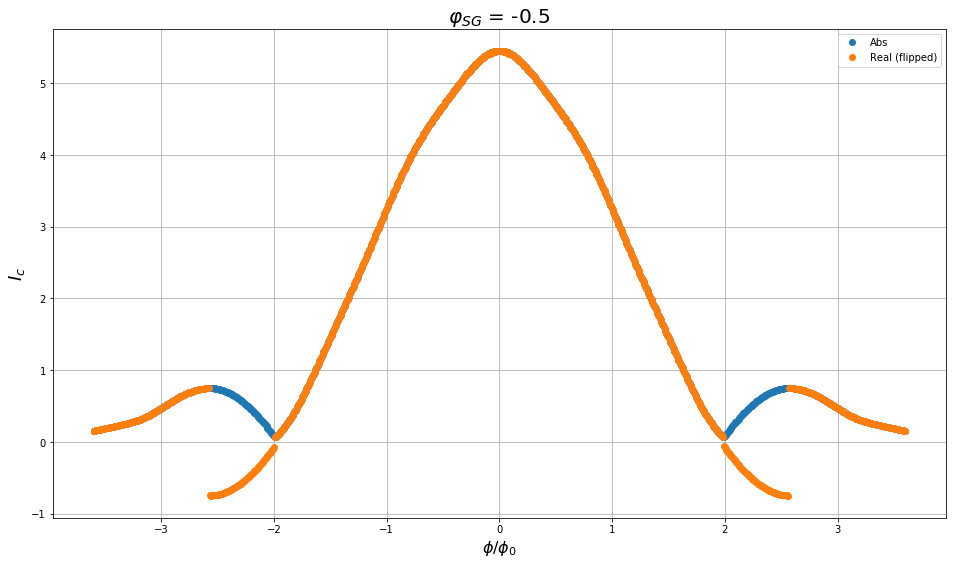

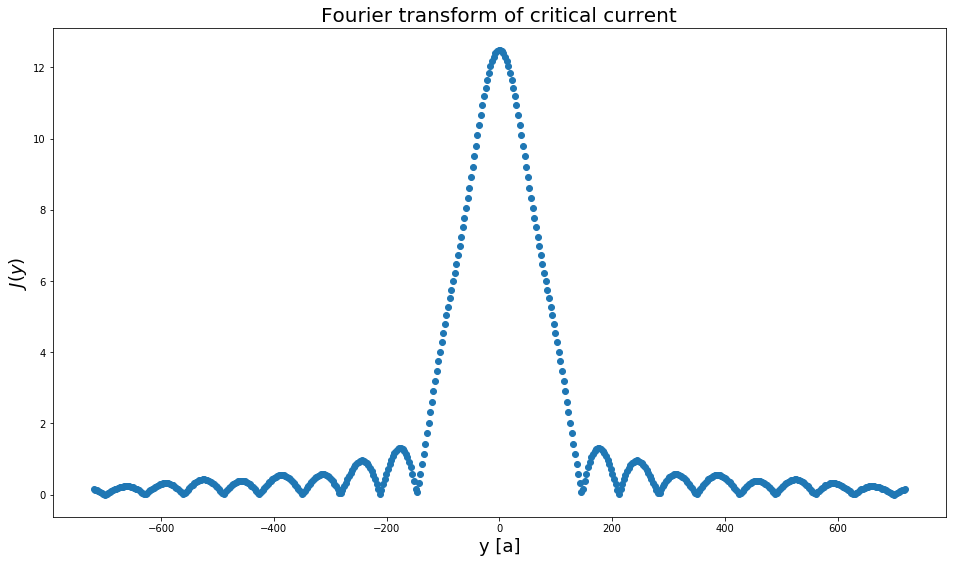

In [11]:
datafile, vsg = list(get_dirs('/home/nefta/thesis/results/wg3_2/supercurrent/'))[6]
values = np.asarray(read_imag_values(datafile)).T
absval , realval, imagval = values
realval_osc = flip_minima(absval, realval)
y = np.linspace(-2*W, 2*W, 500)
fourier = transform_to_density(magnetic_field, (realval_osc, imagval), y)
fig, ax = plt.subplots(figsize=(16,9))
ax.set_title(r'$\varphi_{{SG}}$ = {}'.format(vsg), fontsize=20)
ax.plot(phi, absval, marker='o', linestyle='none', label='Abs')
ax.plot(phi, realval_osc, marker='o', linestyle='none', label='Real (flipped)')
ax.legend()
ax.set_xlabel(r'$\phi / \phi_0$', fontsize=16)
ax.set_ylabel(r'$I_c$', fontsize=18)
ax.grid()

fig1, ax1 = plt.subplots(figsize=(16,9))
ax1.plot(y, fourier, marker='o', linestyle='none', )
ax1.set_title('Fourier transform of critical current', fontsize=20)
ax1.set_xlabel('y [a]', fontsize=18)
ax1.set_ylabel(r'$J(y)$',  fontsize=18)